<a href="https://colab.research.google.com/github/aish466-p/AIML-2025/blob/main/lab%206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
np.random.seed(42)
data = np.random.normal(0, 1, 100)  # Normal distribution
outliers = np.random.uniform(5, 10, 5)  # Artificial outliers
data_with_outliers = np.concatenate((data, outliers))

In [4]:
df=pd.DataFrame(data,columns=['data'])
df.describe()


,data
count,100.000000
mean,-0.103847
std,0.908168
min,-2.619745
25%,-0.600906
50%,-0.126956
75%,0.405952
max,1.852278


from matplotlib import pyplot as plt
_df_0['data'].plot(kind='hist', bins=20, title='data')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['data'].plot(kind='line', figsize=(8, 4), title='data')
plt.gca().spines[['top', 'right']].set_visible(False)

In [6]:
df = pd.DataFrame(data_with_outliers, columns=['Value'])

In [7]:
#step 1 : Detect outliers using IQR method
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [8]:
#identify the outlier based on IQR
outliers_iqr = df[(df['Value'] < lower_bound) | (df['Value'] > upper_bound)]

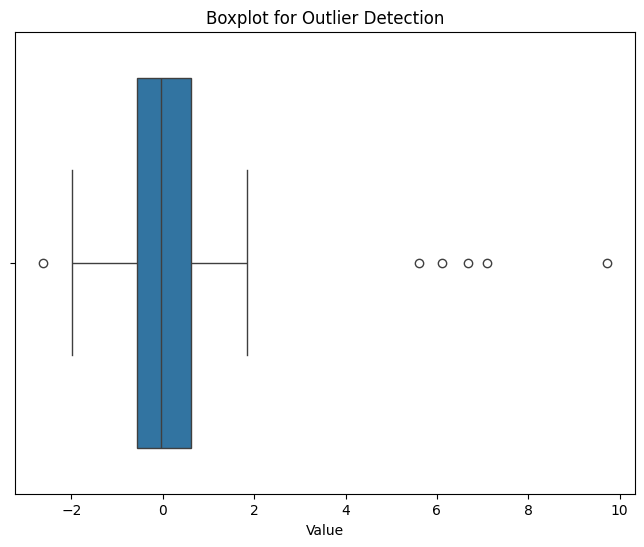

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Value'])
plt.title("Boxplot for Outlier Detection")
plt.show()

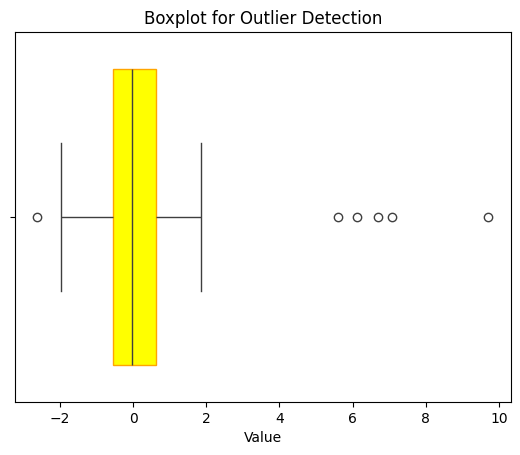

In [14]:
sns.boxplot(x=df['Value'], boxprops=dict(facecolor='yellow', edgecolor='orange'))
plt.title("Boxplot for Outlier Detection")
plt.show()

In [15]:
df_capped = df.copy()
df_capped['Value'] = np.clip(df_capped['Value'], lower_bound, upper_bound)

In [16]:
df_removed = df.copy()
df_removed = df_removed[(df_removed['Value'] >= lower_bound) &
(df_removed['Value'] <= upper_bound)]

In [17]:
df_imputed = df.copy()
median_value = df['Value'].median()
df_imputed['Value'] = np.where((df_imputed['Value'] < lower_bound) |
(df_imputed['Value'] > upper_bound), median_value, df_imputed['Value'])

In [18]:
df_imputed

,Value
0,0.496714
1,-0.138264
2,0.647689
3,1.523030
4,-0.234153
...,...
100,-0.035826
101,-0.035826
102,-0.035826
103,-0.035826


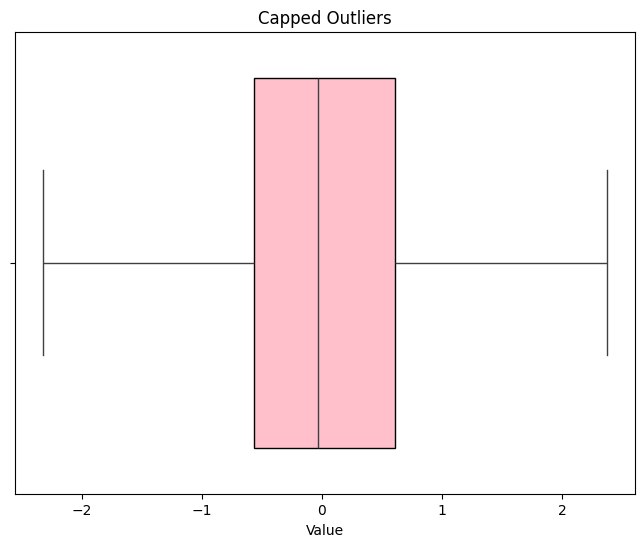

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_capped['Value'], boxprops=dict(facecolor='pink', edgecolor='black'))
plt.title("Capped Outliers")
plt.show()